## K-Means Clustering Pre-Class

1. There is no label defined for our observations in unsupervised learning; this means we don't have a "target" variable in the data. Instead, the data will self-classify itself.

2. The aim is to ensure that each cluster consists of similar data within itself but to ensure that the clusters are not alike each other.

3. K-means is one of the most commonly used clustering algorithms, especially in customer segmentation areas. This is because it can cluster large-scale data quickly and effectively.

4. "K" refers to the number of fixed clusters needed before starting the algorithm.

5. The basic idea in the K-Means is to find the k value that optimally divides the data and identify the best centers of the k sets. These are called centroids.

6. Steps of K-means:
    - The algorithm begins by selecting random observations and making these observations first centroids. It then works by repeating the following two steps,
    - Assign each data point to the nearest cluster center. (centroid)
    - Create new centroids, averaging all data points assigned to each cluster center.
    - The algorithm stops when the difference between the old and new centroids is lower than a given threshold.
7. Elbow Method:
    - To adjust the k value, we want to actually keep track of this sum of square distance (SSD) value for a range of different values.
8. Silhoutte Score:
    - We can also use silhoutte score to find best k value of clusters.
    - Contrary to sum of square distance (SSD), we examine the k numbers that have maximum silhoutte score value.
    
9. K-Means Algorithm Pros:
    - Simple to understand
    - Easy to implement
10. K-Means Algorithm Cons:
    - Need to pick number of clusters
    - Sensitive to outliers
    - Needs standardization

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("irisdata.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape

(150, 5)

In [14]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

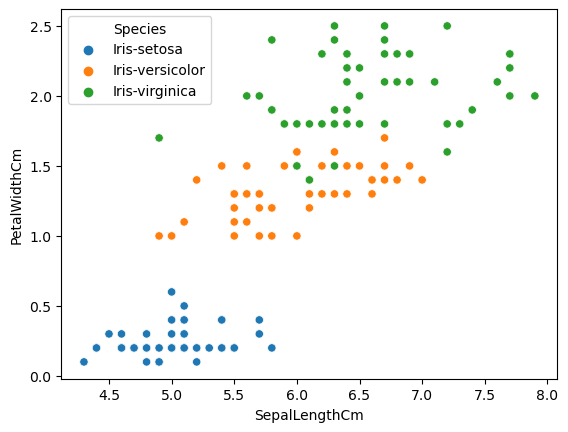

In [16]:
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalWidthCm", hue ="Species");

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df[["SepalLengthCm", "PetalWidthCm"]]

In [19]:
km_model = KMeans(n_clusters=3, n_init=3, init="random", random_state=42)

In [35]:
km_model.fit(X)

KMeans(n_clusters=14)

In [21]:
y_pred = km_model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0])

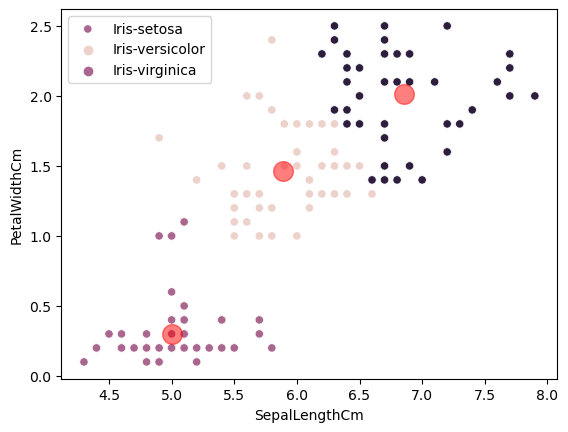

In [27]:
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalWidthCm", hue = y_pred)
plt.legend(labels = df["Species"].unique())

centers = km_model.cluster_centers_
plt.scatter(x = centers[:, 0], y = centers[:, 1], c ="red", s=200, alpha=0.5);

In [28]:
km_model.inertia_

32.76801587301587

In [36]:
newdata = [[4.7, 0.8]]
y_pred = km_model.predict(newdata)
y_pred

array([8])

###  Elbow Method

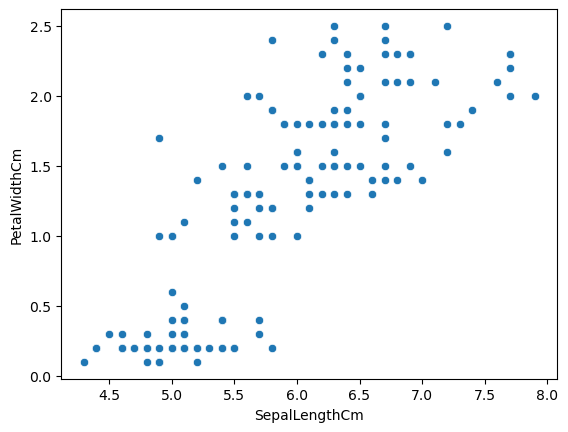

In [32]:
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalWidthCm");

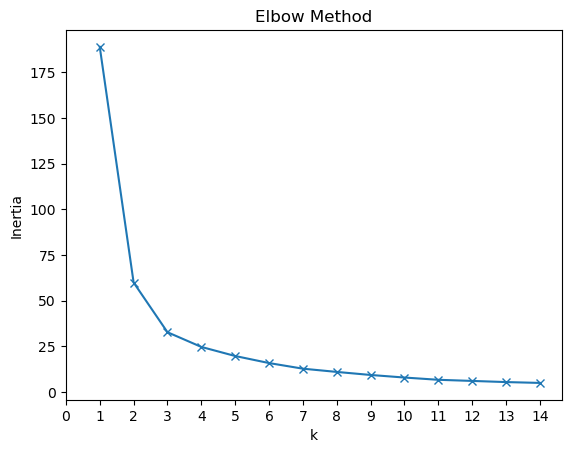

In [37]:
inertia = []
K = range(1, 15)
for k in K:
    km_model = KMeans(n_clusters=k)
    km_model = km_model.fit(X)
    inertia.append(km_model.inertia_)
    
plt.plot(K, inertia, marker="x")
plt.xlabel("k")
plt.xticks(np.arange(15))
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Silhoutte Score 
- Silhoutte score is a metric used to calculate the goodness of a clustering technique. It's values range from -1 to 1.
    - 1 : Means clusters are well apart from each other and clearly distiguished.
    - 0 : Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    - -1 : Means clusters are assigned in the wrong way.

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
km_model = KMeans(n_clusters=2)
km_model.fit(X)
label = km_model.predict(X)

In [47]:
print(f'Silhouette Score(n=2): {silhouette_score(X, label)}')

Silhouette Score(n=2): 0.5645198445230694


In [53]:
for i in range(2, 10):
    km_model = KMeans(n_clusters=i)
    km_model.fit(X)
    label = km_model.predict(X)
    print(f'Silhouette Score(n={i}): {silhouette_score(X, label)}')

Silhouette Score(n=2): 0.5645198445230694
Silhouette Score(n=3): 0.5038084350159749
Silhouette Score(n=4): 0.4632431436907124
Silhouette Score(n=5): 0.47177633713325823
Silhouette Score(n=6): 0.4230200730386501
Silhouette Score(n=7): 0.4278964843044498
Silhouette Score(n=8): 0.424816328222793
Silhouette Score(n=9): 0.4449284549013267
